In [1]:
# Importing Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


from termcolor import colored
import plotly.express as px

import warnings
warnings.filterwarnings("ignore")

In [2]:
# Reading File

df = pd.read_csv("netflix_titles.csv")

In [3]:
#Checking Data Frame

df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,81145628,Movie,Norm of the North: King Sized Adventure,"Richard Finn, Tim Maltby","Alan Marriott, Andrew Toth, Brian Dobson, Cole...","United States, India, South Korea, China","September 9, 2019",2019,TV-PG,90 min,"Children & Family Movies, Comedies",Before planning an awesome wedding for his gra...
1,80117401,Movie,Jandino: Whatever it Takes,NaN,Jandino Asporaat,United Kingdom,"September 9, 2016",2016,TV-MA,94 min,Stand-Up Comedy,Jandino Asporaat riffs on the challenges of ra...
2,70234439,TV Show,Transformers Prime,NaN,"Peter Cullen, Sumalee Montano, Frank Welker, J...",United States,"September 8, 2018",2013,TV-Y7-FV,1 Season,Kids' TV,"With the help of three human allies, the Autob..."
3,80058654,TV Show,Transformers: Robots in Disguise,NaN,"Will Friedle, Darren Criss, Constance Zimmer, ...",United States,"September 8, 2018",2016,TV-Y7,1 Season,Kids' TV,When a prison ship crash unleashes hundreds of...
4,80125979,Movie,#realityhigh,Fernando Lebrija,"Nesta Cooper, Kate Walsh, John Michael Higgins...",United States,"September 8, 2017",2017,TV-14,99 min,Comedies,When nerdy high schooler Dani finally attracts...


In [4]:
#Checking general info about dataframe

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6234 entries, 0 to 6233
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       6234 non-null   int64 
 1   type          6234 non-null   object
 2   title         6234 non-null   object
 3   director      4265 non-null   object
 4   cast          5664 non-null   object
 5   country       5758 non-null   object
 6   date_added    6223 non-null   object
 7   release_year  6234 non-null   int64 
 8   rating        6224 non-null   object
 9   duration      6234 non-null   object
 10  listed_in     6234 non-null   object
 11  description   6234 non-null   object
dtypes: int64(2), object(10)
memory usage: 584.6+ KB


In [5]:
#Checking DataFrame size
#df.shape

print(colored("There are {} row and {} columns.".format(df.shape[0],df.shape[1]),attrs=["bold"]))

There are 6234 row and 12 columns.


In [6]:
# Checking columns names

df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [7]:
#Checking duplicates rows

#df.duplicated().value_counts()
print(colored("There are duplicates {}.".format(df.duplicated().value_counts()),attrs=['bold']))

There are duplicates False    6234
dtype: int64.


In [8]:
#Checking null values based on columns

df.isnull().sum()


show_id            0
type               0
title              0
director        1969
cast             570
country          476
date_added        11
release_year       0
rating            10
duration           0
listed_in          0
description        0
dtype: int64

In [9]:
#Director record have too much null so i will drop it
df.drop(['director'],axis = 1,inplace = True)


In [10]:
#Since Netflix is created in the USA and every show is broadcast in the US,
#I will fill in all missing values in the 'country' column with the United States.

df['country'].replace(np.nan, "United States",inplace = True)

In [11]:
#I choose to drop the 'dump' columns altogether as they have missing values and dropping these columns will not effect my visualization
#df.drop(['cast'],axis=1,inplace = True)

In [12]:
df.head()

,show_id,type,title,cast,country,date_added,release_year,rating,duration,listed_in,description
0,81145628,Movie,Norm of the North: King Sized Adventure,"Alan Marriott, Andrew Toth, Brian Dobson, Cole...","United States, India, South Korea, China","September 9, 2019",2019,TV-PG,90 min,"Children & Family Movies, Comedies",Before planning an awesome wedding for his gra...
1,80117401,Movie,Jandino: Whatever it Takes,Jandino Asporaat,United Kingdom,"September 9, 2016",2016,TV-MA,94 min,Stand-Up Comedy,Jandino Asporaat riffs on the challenges of ra...
2,70234439,TV Show,Transformers Prime,"Peter Cullen, Sumalee Montano, Frank Welker, J...",United States,"September 8, 2018",2013,TV-Y7-FV,1 Season,Kids' TV,"With the help of three human allies, the Autob..."
3,80058654,TV Show,Transformers: Robots in Disguise,"Will Friedle, Darren Criss, Constance Zimmer, ...",United States,"September 8, 2018",2016,TV-Y7,1 Season,Kids' TV,When a prison ship crash unleashes hundreds of...
4,80125979,Movie,#realityhigh,"Nesta Cooper, Kate Walsh, John Michael Higgins...",United States,"September 8, 2017",2017,TV-14,99 min,Comedies,When nerdy high schooler Dani finally attracts...


In [13]:
## add new features in the dataset
df["date_added"] = pd.to_datetime(df['date_added'])
df['year_added'] = df['date_added'].dt.year
df['month_added'] = df['date_added'].dt.month

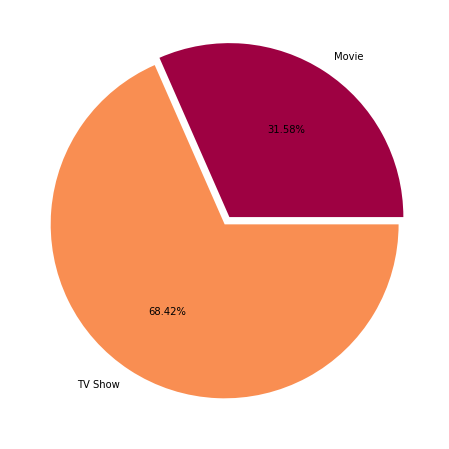

In [14]:
#Content type on Netflix
plt.figure(figsize=(16,8))

cmap = plt.get_cmap('Spectral')
colors = [cmap(i) for i in np.linspace(0, 1, 5)]
plt.pie(df['type'].value_counts().sort_values(),
        labels=df['type'].value_counts().index,explode=[0.05,0],
        autopct='%1.2f%%',
        colors=colors);

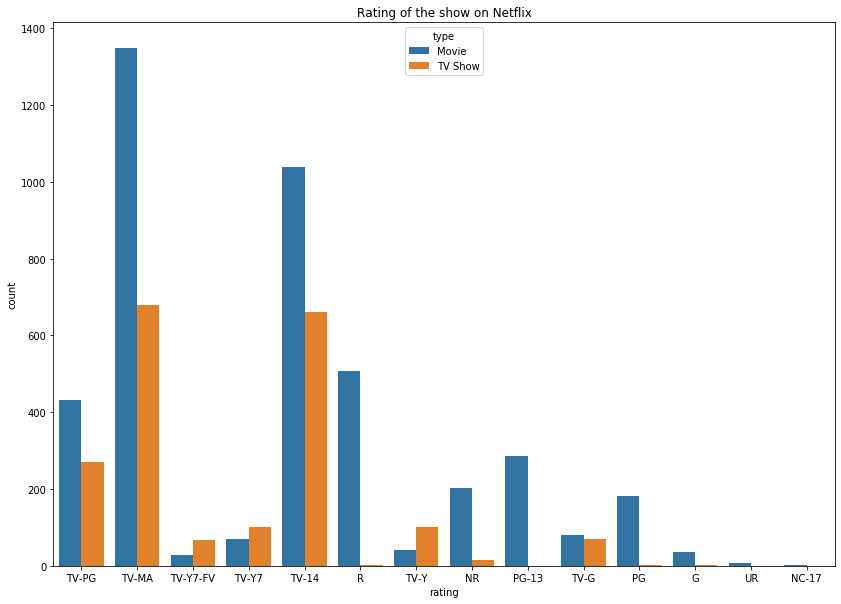

In [15]:
plt.figure(figsize = (14,10))
sns.countplot(x='rating',data = df,hue='type')
plt.title("Rating of the show on Netflix");


Text(0.5, 1.0, 'Top 10 Genres of TV Shows')

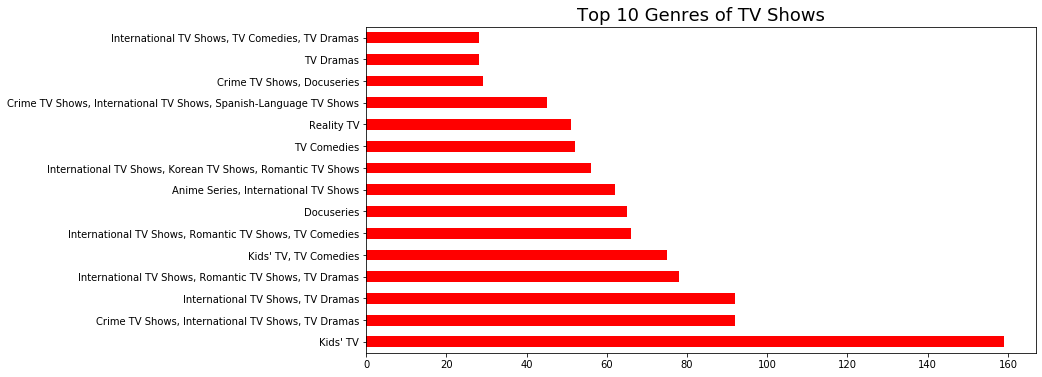

In [16]:
plt.figure(figsize=(12,6))
df[df["type"]=="TV Show"]["listed_in"].value_counts()[:15].plot(kind="barh",color="r")
plt.title("Top 10 Genres of TV Shows",size=18)

Text(0.5, 1.0, 'Top 10 Genres of Movies')

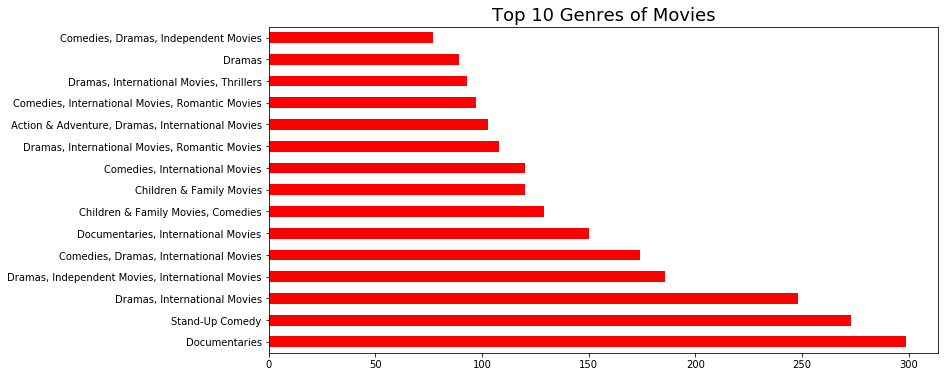

In [17]:
plt.figure(figsize=(12,6))
df[df["type"]=="Movie"]["listed_in"].value_counts()[:15].plot(kind="barh",color="r")
plt.title("Top 10 Genres of Movies",size=18)

In [18]:
d1 = df[df["type"] == "TV Show"]
d2 = df[df["type"] == "Movie"]

col = "year_added"

vc1 = d1[col].value_counts().reset_index()
vc1 = vc1.rename(columns = {col : "count", "index" : col})
vc1['percent'] = vc1['count'].apply(lambda x : 100*x/sum(vc1['count']))
vc1 = vc1.sort_values(col)

vc2 = d2[col].value_counts().reset_index()
vc2 = vc2.rename(columns = {col : "count", "index" : col})
vc2['percent'] = vc2['count'].apply(lambda x : 100*x/sum(vc2['count']))
vc2 = vc2.sort_values(col)

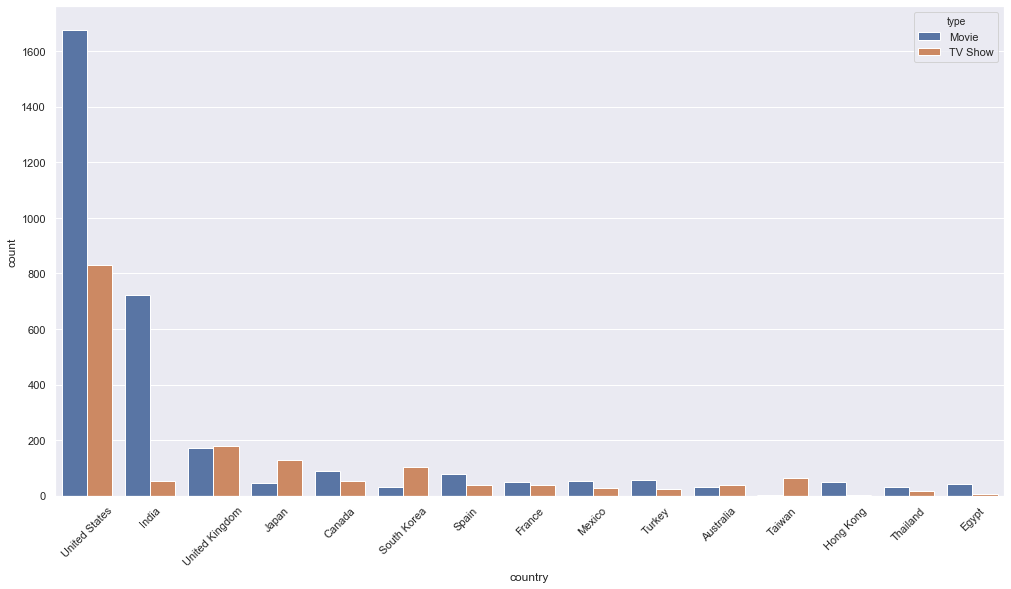

In [19]:
sns.set()
plt.figure(figsize=(17,9))
sns.countplot(x="country",data= df,hue= "type",order = df['country'].value_counts().index[0:15])
plt.xticks(rotation=45)
plt.show()

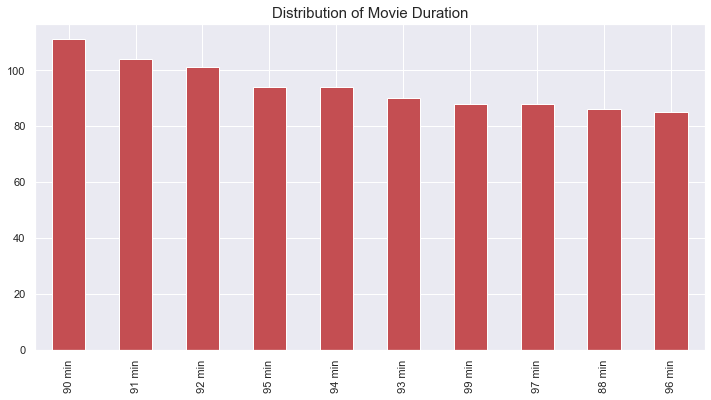

In [47]:
time = df[df["type"] == "Movie"]['duration'].value_counts()

plt.figure(figsize=(12,6))

time[:10].plot(kind="bar",color="r")
plt.title('Distribution of Movie Duration',size=15);


In [48]:
Country = pd.DataFrame(df["country"].value_counts().reset_index().values,columns=["country","TotalShows"])
Country.head()

fig = px.choropleth(   
    locationmode='country names',
    locations=Country.country,
    featureidkey="Country.country",
    labels=Country["TotalShows"],
   
    )
fig.show()